In [2]:
% matplotlib inline

from matplotlib import pyplot as plt
# Make the plots bigger
plt.rcParams['figure.figsize'] = 10, 10

import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
from sklearn import datasets, linear_model
from sklearn.cross_validation import train_test_split

/Users/mwitebsky/anaconda2/envs/lesson01/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [10]:
# Load the Boston Housing dataset
boston = datasets.load_boston()
df = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target
# Take a look at the data again
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [13]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.4)
print X_train.shape, y_train.shape
print X_test.shape, y_test.shape

(303, 13) (303,)
(203, 13) (203,)


Score: 0.723764607176


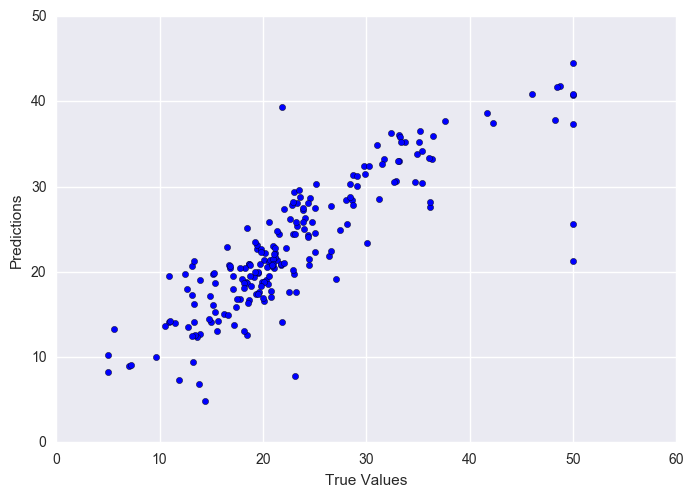

In [14]:
lm = linear_model.LinearRegression()

model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

## The line / model
plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")

print "Score:", model.score(X_test, y_test)    

Cross-validated scores: [ 0.64224005  0.61152091  0.51447066  0.78503274 -0.14367345 -0.01539034]
Cross-Predicted Accuracy: 0.537671767736


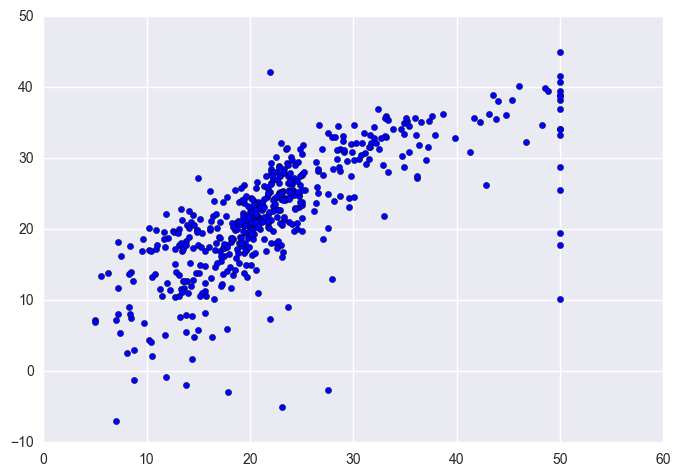

In [17]:
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics

# Perform 6-fold cross validation
scores = cross_val_score(model, df, y, cv=6)
print "Cross-validated scores:", scores
# Make cross validated predictions
predictions = cross_val_predict(model, df, y, cv=6)
plt.scatter(y, predictions)
accuracy = metrics.r2_score(y, predictions)
print "Cross-Predicted Accuracy:", accuracy

(253, 13) (253,)
(253, 13) (253,)
Score: 0.712079667027


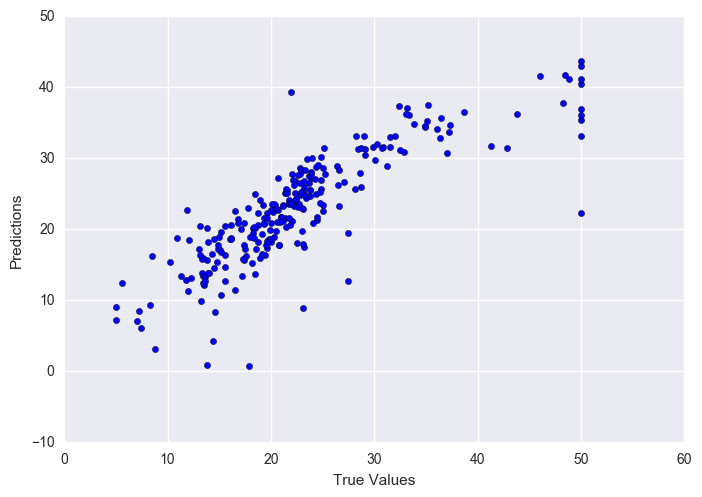

In [36]:
score_lst = []
from sklearn import datasets
from sklearn.cross_validation import cross_val_predict
from sklearn import linear_model
import matplotlib.pyplot as plt

lm = linear_model.LinearRegression()
boston = datasets.load_boston()
y = boston.target

X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.5)
print X_train.shape, y_train.shape
print X_test.shape, y_test.shape

model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

## The line / model
plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")

print "Score:", model.score(X_test, y_test)    


In [37]:
score_lst.append(['50/50',model.score(X_test, y_test), accuracy])

(151, 13) (151,)
(355, 13) (355,)
Score: 0.660040063966


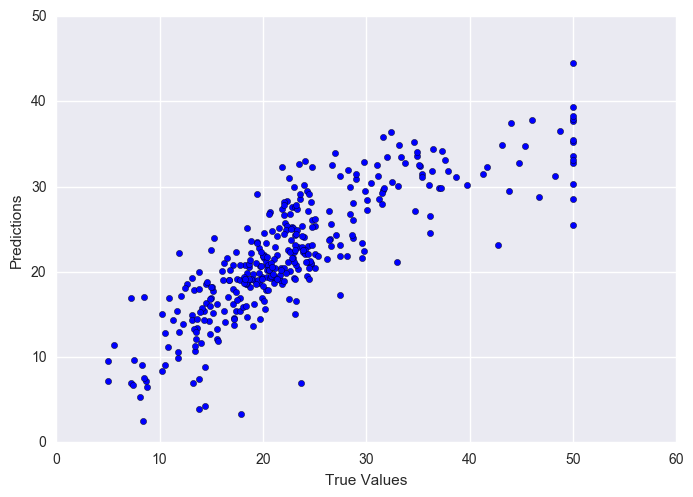

In [38]:

lm = linear_model.LinearRegression()
boston = datasets.load_boston()
y = boston.target

X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.7)
print X_train.shape, y_train.shape
print X_test.shape, y_test.shape

model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

## The line / model
plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")

print "Score:", model.score(X_test, y_test)   

In [39]:
score_lst.append(['70/30',model.score(X_test, y_test), accuracy])

(50, 13) (50,)
(456, 13) (456,)
Score: 0.549558485577


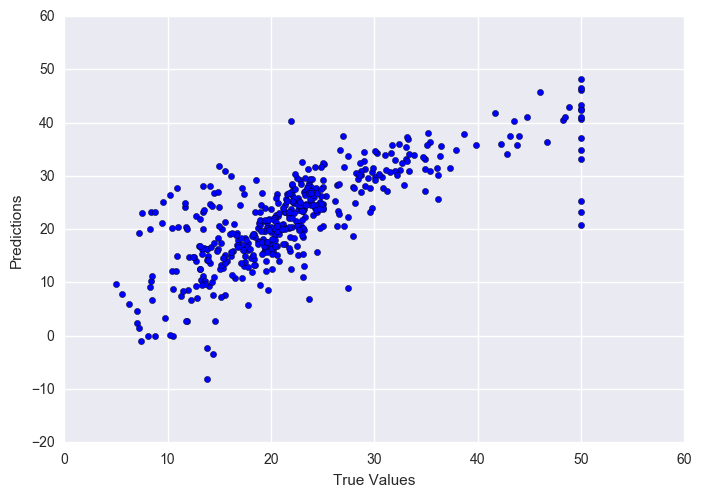

In [40]:

lm = linear_model.LinearRegression()
boston = datasets.load_boston()
y = boston.target

X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.9)
print X_train.shape, y_train.shape
print X_test.shape, y_test.shape

model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

## The line / model
plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")

print "Score:", model.score(X_test, y_test)  

In [41]:
score_lst.append(['90/10',model.score(X_test, y_test), accuracy])

In [42]:
score_lst

[['50/50', 0.71207966702693248, 0.55965243464550918],
 ['70/30', 0.66004006396642945, 0.55965243464550918],
 ['90/10', 0.54955848557692155, 0.55965243464550918]]

In [56]:
fifty_fifty = []
for i in range(1,50):
    x_train, x_test, y_train, y_test = train_test_split(df[['CRIM', 'NOX']], y, test_size=0.5)
    lm = linear_model.LinearRegression()   
    model = lm.fit(x_train, y_train)       
    predictions = lm.predict(x_test)       
    fifty_fifty.append(model.score(x_test, y_test))
print "50/50 Std: ", np.mean(fifty_fifty), np.std(fifty_fifty)

sixty_fourty = []
for i in range(1,50):
    x_train, x_test, y_train, y_test = train_test_split(df, y, test_size=0.4)
    lm = linear_model.LinearRegression()   
    model = lm.fit(x_train, y_train)       
    predictions = lm.predict(x_test)      
    sixty_fourty.append(model.score(x_test, y_test))
print "60/40 Std: ", np.mean(sixty_fourty), np.std(sixty_fourty)

ninety_ten = []
for i in range(1,50):
    x_train, x_test, y_train, y_test = train_test_split(df, y, test_size=0.1)
    lm = linear_model.LinearRegression()   
    model = lm.fit(x_train, y_train)     
    predictions = lm.predict(x_test)    
    ninety_ten.append(model.score(x_test, y_test))
print "90/10 Std: ", np.mean(ninety_ten), np.std(ninety_ten)



50/50 Std:  0.71466340396 0.0268387701304
60/40 Std:  0.703398252924 0.03913832046
90/10 Std:  0.706899716309 0.0928402901242


In [91]:
df['TAX2'] = df['TAX']*df['TAX']
dfs = [df[['CRIM', 'NOX']], df[['LSTAT', 'RM', 'AGE']], df[['TAX', 'TAX2']]]
tsize = [.5, .4, .3]

for item in dfs:
    for size in tsize:
        x_train, x_test, y_train, y_test = train_test_split(item, y, test_size=size)
        lm = linear_model.LinearRegression()   
        model = lm.fit(x_train, y_train)       
        predictions = lm.predict(x_test)
        print '{:<25} test size: {:<5} Score:{:.2}'.format(list(item), size, model.score(x_test, y_test))

['CRIM', 'NOX']           test size: 0.5   Score:0.25
['CRIM', 'NOX']           test size: 0.4   Score:0.18
['CRIM', 'NOX']           test size: 0.3   Score:0.27
['LSTAT', 'RM', 'AGE']    test size: 0.5   Score:0.63
['LSTAT', 'RM', 'AGE']    test size: 0.4   Score:0.59
['LSTAT', 'RM', 'AGE']    test size: 0.3   Score:0.61
['TAX', 'TAX2']           test size: 0.5   Score:0.24
['TAX', 'TAX2']           test size: 0.4   Score:0.11
['TAX', 'TAX2']           test size: 0.3   Score:0.17
